In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
import my_functions as mf
import numpy.linalg as ln
savefig=True
path = '../Data/023/Lev5/'
input_file1 = h5py.File(path+'Horizons.h5','r')
SXSA = input_file1['AhA.dir']['CoordCenterInertial.dat']
SXSB = input_file1['AhB.dir']['CoordCenterInertial.dat']
SXSC = input_file1['AhC.dir']['CoordCenterInertial.dat']
def norm(vector):
    return np.sqrt(vector[:,0]*vector[:,0]+vector[:,1]*vector[:,1]+vector[:,2]*vector[:,2])
def dot(A,B):
    return A[:,0]*B[:,0]+A[:,1]*B[:,1]+A[:,2]*B[:,2]
def diff(A):
    A = np.transpose(A) #Transpose
    A = np.diff(A)
    A = np.transpose(A)
    return A

In [84]:
PosA = SXSA[:,1:4]
PosB = SXSB[:,1:4]
Rad = PosA-PosB
VelocityA = diff(PosA)
VelocityB = diff(PosB)
normal = np.cross(Rad[1:],VelocityA)

In [85]:
zaxis = normal * 0 + [0,0,1]
cos = dot(normal,zaxis)/norm(normal)

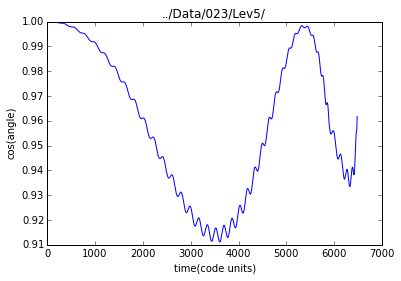

In [86]:
plt.figure(1)
plt.title(path)
plt.xlabel('time(code units)')
plt.ylabel('cos(angle)')
plt.plot(cos)
plt.savefig('images/2')
plt.show()